In [13]:
# import libreries 

import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import sys


# Normalizer
from sklearn.preprocessing import StandardScaler

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(images , targets), (_, _) = fashion_mnist.load_data()

images = images[:10000]
targets = targets[:10000]

#flatten

images = images.reshape(-1,784)
images = images.astype(float)


In [4]:
#Normalize
scaler = StandardScaler()
images = scaler.fit_transform(images)


print("Images shape: ",images.shape)
print("Targets shape :",targets.shape)

Images shape:  (10000, 784)
Targets shape : (10000,)


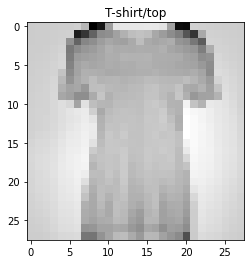

In [5]:
#Plot images

targets_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#plot image 
plt.imshow(images[10].reshape(28,28),cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [6]:
#print("First lignes of one image", images[11])
#print("Associated target",targets[11])

In [7]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape = [28,28]))

#Add Layers
model.add(tf.keras.layers.Dense(256, activation="relu"))  #Hiden layer 1 
model.add(tf.keras.layers.Dense(128, activation="relu"))  #Hiden layer 2
model.add(tf.keras.layers.Dense(10, activation="softmax"))  #Output layer wtih 10 classes 


model_output = model.predict(images[0:1])
#print("- Image and target",images[0:1],targets[0:1])
print("- Image predicted:",model_output,targets[0:1])

1/1 [==============================] - 0s 183ms/step
- Image predicted: [[0.00798303 0.20318733 0.08391377 0.11003522 0.01541969 0.29058585
  0.01195136 0.15004301 0.11764745 0.00923332]] [9]


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the  model

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer ="sgd",
    metrics=["accuracy"]
)

In [10]:
history = model.fit(images,targets,epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.8316 - accuracy: 0.7238
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.8241
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8499
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8659
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8750
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8854
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8958
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8999
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2710 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2584 - accuracy: 0.9105

# LOSS FUNCTION

## Categorical cross entropy

In [11]:
images_test = images[:5]
labels_test = targets[:5]


print(images_test.shape)
print(labels_test)


outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output",outputs_test)


print("\nLabels",labels_test)

filtered_outputs_test = outputs_test[np.arange(5),labels_test]
print("\nFiltered ouput",filtered_outputs_test)

log_filtered_ouput =np.log(filtered_outputs_test)
print("\nLog Filtered ouput",log_filtered_ouput)

print("Mean:",log_filtered_ouput.mean())
print("Mean:",-log_filtered_ouput.mean())

(5, 784)
[9 0 0 3 0]
1/1 [==============================] - 0s 73ms/step
(5, 10)
Output [[2.0065524e-06 2.6489840e-07 7.9494112e-07 1.0609173e-06 3.2048904e-06
  4.3981284e-04 1.4295875e-06 3.7895783e-03 2.1187014e-04 9.9555004e-01]
 [9.9658358e-01 1.3149056e-06 1.2066345e-04 1.0639123e-04 2.4227535e-07
  1.9612534e-07 3.1710118e-03 1.2340838e-07 1.6345619e-05 1.1538149e-07]
 [4.9541947e-01 2.7272470e-02 1.2356063e-02 2.5453886e-01 8.6599052e-02
  4.4605866e-04 1.1293975e-01 1.3497716e-03 8.3456216e-03 7.3285977e-04]
 [3.5760075e-01 6.3400570e-04 1.7518766e-02 4.9013805e-01 2.2870137e-03
  1.8407329e-05 1.3088652e-01 5.0284296e-05 6.8883016e-04 1.7731362e-04]
 [1.3183521e-01 7.1048392e-03 2.3678856e-03 8.3307457e-01 1.0631556e-03
  2.0400168e-05 2.3695720e-02 6.0098715e-05 5.2568945e-04 2.5240902e-04]]

Labels [9 0 0 3 0]

Filtered ouput [0.99555004 0.9965836  0.49541947 0.49013805 0.1318352 ]

Log Filtered ouput [-0.00445989 -0.00342227 -0.70235044 -0.7130682  -2.0262027 ]
Mean: -0.68

In [12]:
#Train the model


model = model.fit(images,targets,epochs=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.9190
